Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  
Data Shapes
Train (22271, 32, 32, 3) (22271,)
Validation (5568, 32, 32, 3) (5568,)
Test (6960, 32, 32, 3) (6960,)
Data shape (43, 2) <class 'pandas.core.frame.DataFrame'>


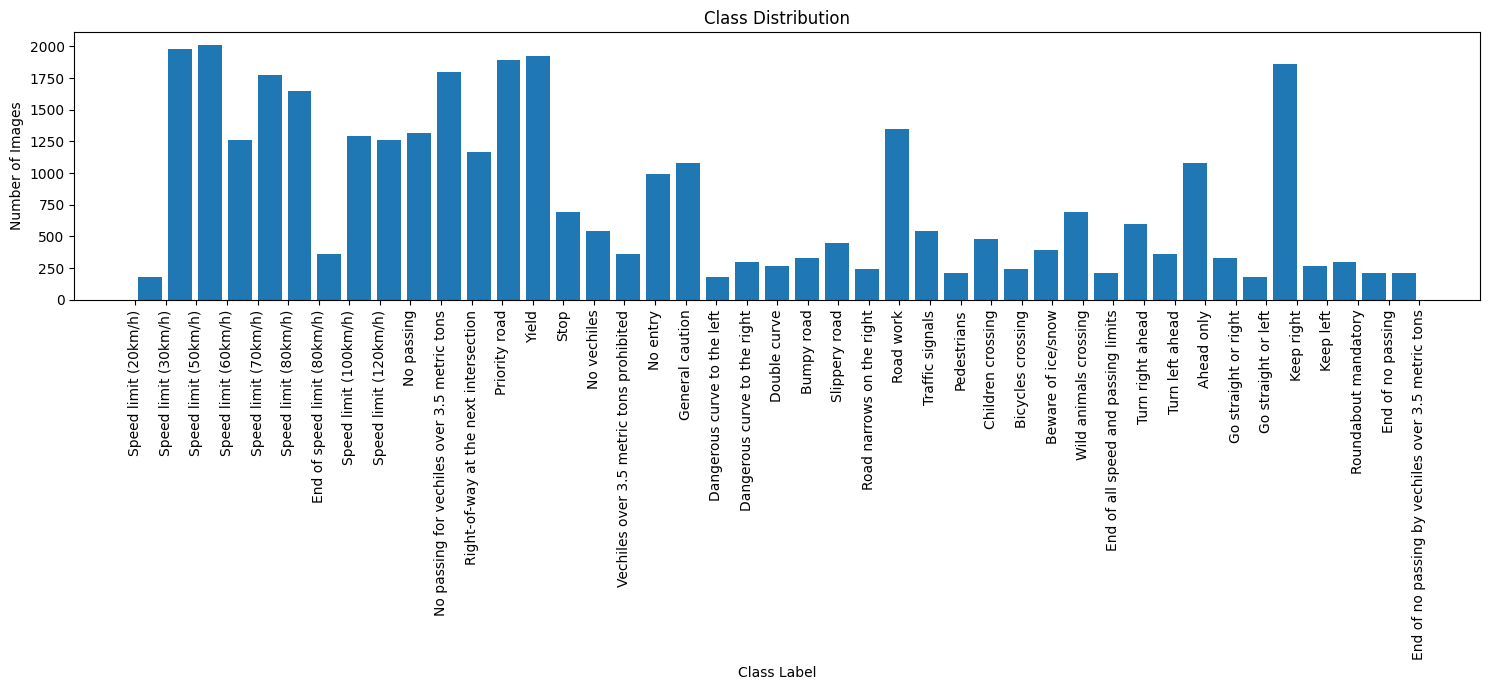

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 60)        1560      
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 60)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 30)        16230     
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                  

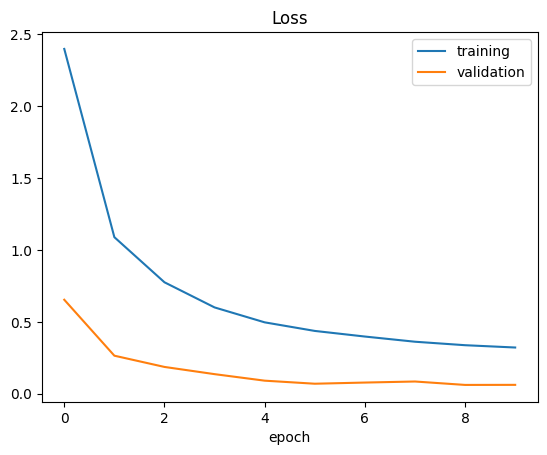

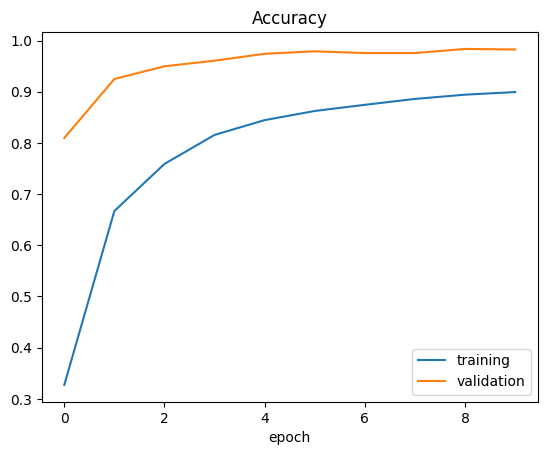

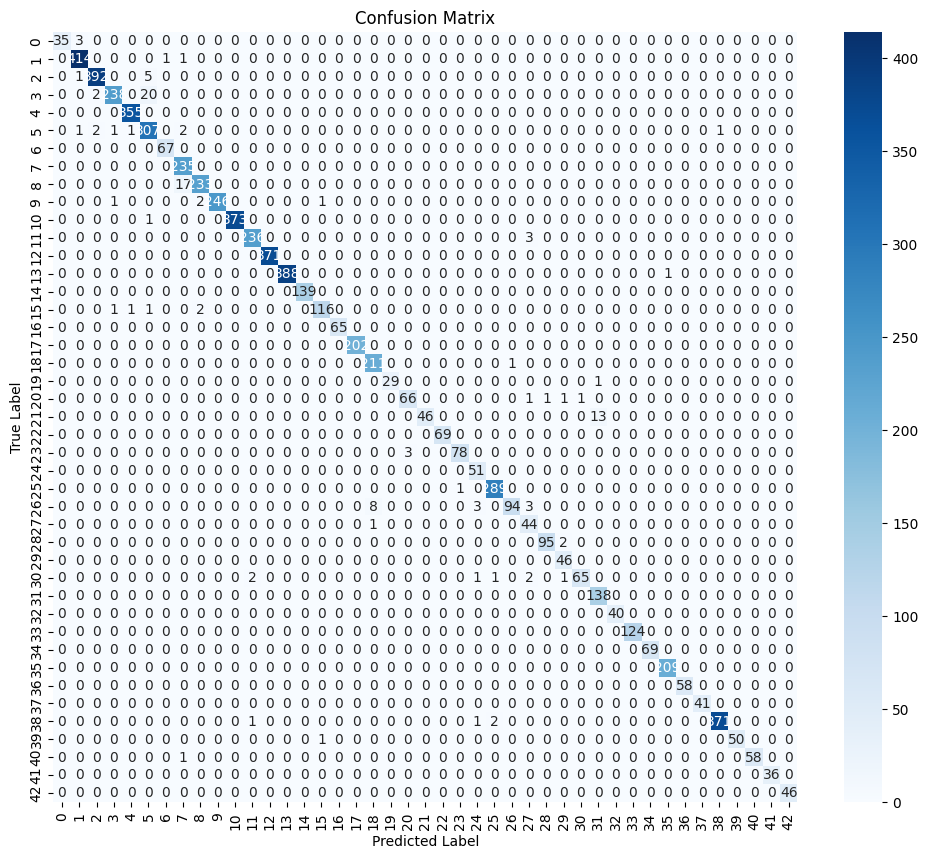

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       0.99      1.00      0.99       416
           2       0.99      0.98      0.99       398
           3       0.99      0.92      0.95       260
           4       0.99      1.00      1.00       355
           5       0.92      0.97      0.95       315
           6       0.99      1.00      0.99        67
           7       0.92      1.00      0.96       235
           8       0.98      0.93      0.96       250
           9       1.00      0.98      0.99       250
          10       1.00      1.00      1.00       374
          11       0.99      0.99      0.99       239
          12       1.00      1.00      1.00       371
          13       1.00      1.00      1.00       389
          14       1.00      1.00      1.00       139
          15       0.98      0.96      0.97       121
          16       1.00      1.00      1.00        65
   

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2
import os
import scipy.stats as stats

# Paths
path = "C:/Users/ymsma/Downloads/Dataset/Dataset"
labelFile = "C:/Users/ymsma/Downloads/labels.csv"

# Hyperparameters
batch_size_val = 32
epochs_val = 10
imageDimesions = (32, 32, 3)
testRatio = 0.2
validationRatio = 0.2

# Load images and labels
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:", len(myList))
noOfClasses = len(myList)
print("Importing Classes.....")
for count in range(len(myList)):
    myPicList = os.listdir(os.path.join(path, str(count)))
    for y in myPicList:
        curImg = cv2.imread(os.path.join(path, str(count), y))
        images.append(curImg)
        classNo.append(count)
    print(count, end=" ")
print(" ")

images = np.array(images)
classNo = np.array(classNo)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

print("Data Shapes")
print("Train", X_train.shape, y_train.shape)
print("Validation", X_validation.shape, y_validation.shape)
print("Test", X_test.shape, y_test.shape)

# Load label data
data = pd.read_csv(labelFile)
print("Data shape", data.shape, type(data))

# Preprocessing functions
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def equalize(img):
    return cv2.equalizeHist(img)

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img / 255  # Normalize to [0, 1]
    return img

# Apply preprocessing
X_train = np.array(list(map(preprocessing, X_train)))
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))

# Reshape to add channel dimension (for grayscale)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# Image augmentation
dataGen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
dataGen.fit(X_train)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

# Load label data (ensure labels match noOfClasses)
labels_df = pd.read_csv(labelFile)
class_labels = labels_df['Name'].tolist()

# Check if class labels match the number of classes detected
if len(class_labels) != noOfClasses:
    print(f"Warning: Number of labels ({len(class_labels)}) does not match number of classes ({noOfClasses}).")
else:
    # Histogram of dataset with class names
    plt.figure(figsize=(15, 7))
    plt.hist(classNo, bins=noOfClasses, rwidth=0.8)
    plt.title("Class Distribution")
    plt.xlabel("Class Label")
    plt.ylabel("Number of Images")

    # Set the class names as x-tick labels
    plt.xticks(ticks=np.arange(noOfClasses), labels=class_labels, rotation=90)
    plt.tight_layout()  # Adjust layout to fit long labels
    plt.show()


# Model definition
def myModel():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape=(imageDimesions[0], imageDimesions[1], 1), activation='relu'))
    model.add(Conv2D(60, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses, activation='softmax'))
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = myModel()
print(model.summary())

# Train the model
history = model.fit(dataGen.flow(X_train, y_train, batch_size=batch_size_val), 
                    steps_per_epoch=len(X_train) // batch_size_val, 
                    epochs=epochs_val, 
                    validation_data=(X_validation, y_validation), 
                    shuffle=True)

# Plot training history
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

plt.show()

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report for precision, recall, and F1-score
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Precision, Recall, F1 Score, and Confidence Intervals
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred_classes, average='weighted')

def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard Error of Mean
    interval = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean, mean - interval, mean + interval

# Confidence intervals
precision_ci = confidence_interval(y_pred_classes == y_true)
recall_ci = confidence_interval(y_pred_classes == y_true)
f1_ci = confidence_interval(y_pred_classes == y_true)

print(f"Precision: {precision:.2f}, CI: [{precision_ci[1]:.2f}, {precision_ci[2]:.2f}]")
print(f"Recall: {recall:.2f}, CI: [{recall_ci[1]:.2f}, {recall_ci[2]:.2f}]")
print(f"F1 Score: {f1:.2f}, CI: [{f1_ci[1]:.2f}, {f1_ci[2]:.2f}]")

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score:', score[0])
print('Test Accuracy:', score[1])

# Save the model
model.save("madhu1.h5")


Precision: 0.98, CI: [0.98, 0.99]
Recall: 0.98, CI: [0.98, 0.99]
F1 Score: 0.98, CI: [0.98, 0.99]


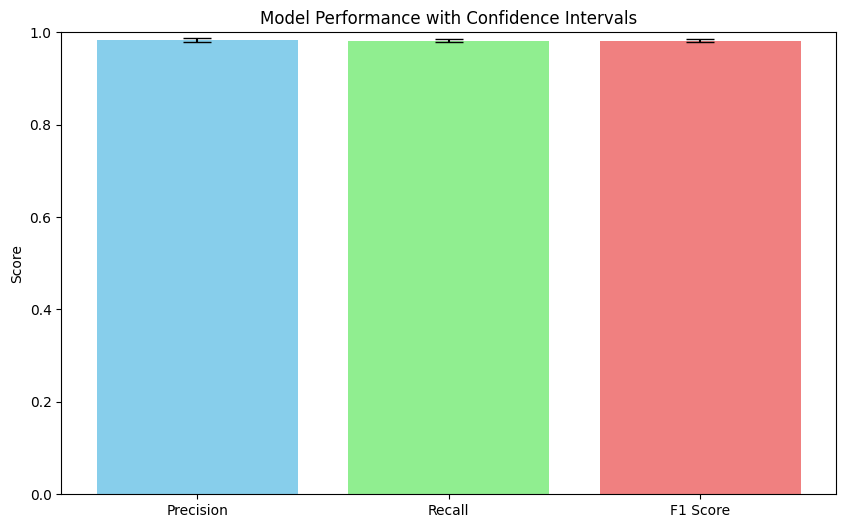

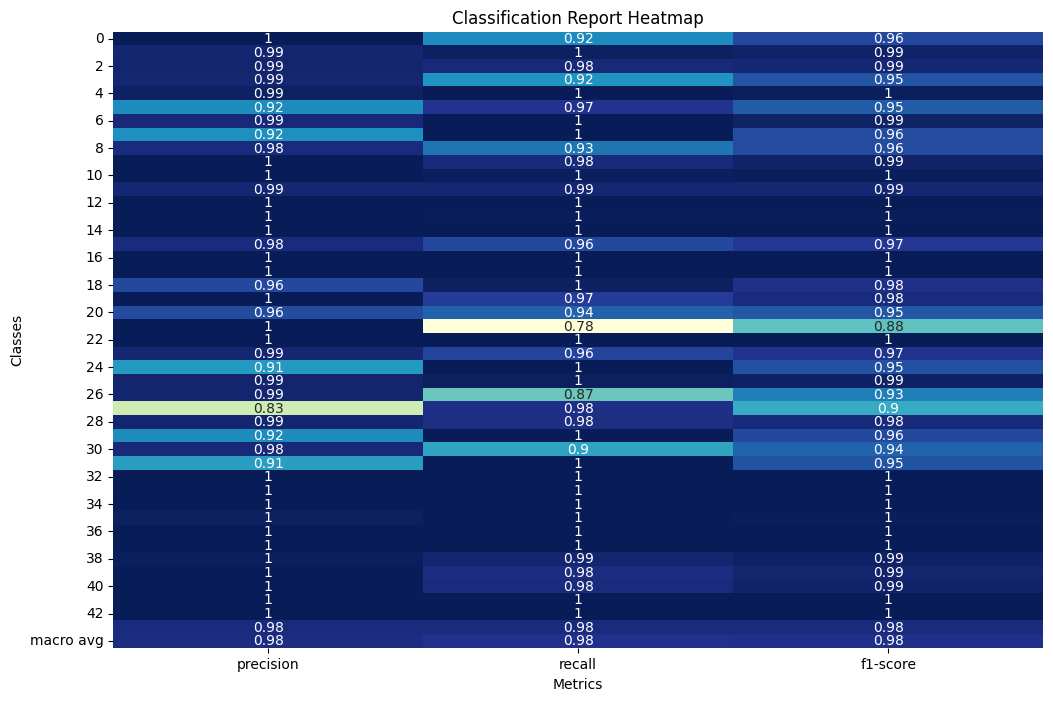

In [13]:
from sklearn.metrics import classification_report, precision_recall_fscore_support
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Assume y_true and y_pred_classes are already defined with true and predicted class labels

# Generate Classification Report
report = classification_report(y_true, y_pred_classes, output_dict=True)

# Compute weighted average Precision, Recall, F1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred_classes, average='weighted')

# Function to calculate confidence interval
def confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard Error of Mean
    interval = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean, mean - interval, mean + interval

# Calculate confidence intervals
precision_ci = confidence_interval(y_pred_classes == y_true)
recall_ci = confidence_interval(y_pred_classes == y_true)
f1_ci = confidence_interval(y_pred_classes == y_true)

# Print metrics with confidence intervals
print(f"Precision: {precision:.2f}, CI: [{precision_ci[1]:.2f}, {precision_ci[2]:.2f}]")
print(f"Recall: {recall:.2f}, CI: [{recall_ci[1]:.2f}, {recall_ci[2]:.2f}]")
print(f"F1 Score: {f1:.2f}, CI: [{f1_ci[1]:.2f}, {f1_ci[2]:.2f}]")

# Bar Plot with Confidence Intervals
metrics = ['Precision', 'Recall', 'F1 Score']
values = [precision, recall, f1]
ci_lower = [precision_ci[1], recall_ci[1], f1_ci[1]]
ci_upper = [precision_ci[2], recall_ci[2], f1_ci[2]]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, yerr=[values[i] - ci_lower[i] for i in range(len(values))], capsize=10, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Model Performance with Confidence Intervals')
plt.ylabel('Score')
plt.ylim(0, 1)  # Scale from 0 to 1
plt.show()

# Heatmap of Classification Report
import seaborn as sns
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(12, 8))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap='YlGnBu', cbar=False)
plt.title("Classification Report Heatmap")
plt.ylabel("Classes")
plt.xlabel("Metrics")
plt.show()
